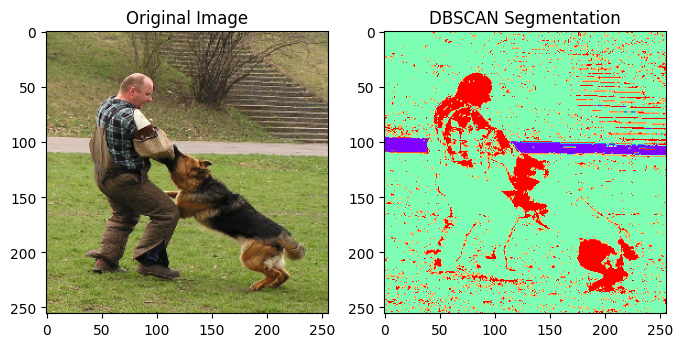

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from PIL import Image
import cv2

# Load the image
image_path = './dog-1407425.jpg'
image = Image.open(image_path)
image = image.convert('RGB')
image = np.array(image)

# Resize the image to speed up processing if needed
image_resized = cv2.resize(image, (256, 256))

# Normalize pixel values to [0, 1]
image_normalized = image_resized / 255.0
M, N = image_normalized.shape[:2]

# Separate the color channels
R = image_normalized[:, :, 0]
G = image_normalized[:, :, 1]
B = image_normalized[:, :, 2]

# # Compute the Normalized Red-Green Difference
# nr_d = (R - G) / (R + G + B + 1e-8)  # Add a small constant to avoid division by zero

# Flatten the image to a 2D array of pixels and the NRGD
# features = np.stack((R.flatten(), G.flatten(), B.flatten(), nr_d.flatten()), axis=1)
features = np.stack((R.flatten(), G.flatten(), B.flatten()), axis=1)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.020, min_samples=100, metric='euclidean')
labels = dbscan.fit_predict(features)

L = np.reshape(labels+1,[M,N])/2

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image_normalized)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(L, cmap='rainbow_r')
plt.title('DBSCAN Segmentation')
plt.show()